In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
from tqdm import tqdm

In [4]:
%matplotlib inline

In [10]:
seq1= 'GAGAAAGACC-AGCATCCATAGG'
seq2= 'GGGAAAGACCCAGCATCCGTNGG'

In [11]:
def string_to_array(my_string):
    my_array = np.array(list(my_string))
    return my_array

In [12]:
arr1= string_to_array(seq1)

In [13]:
arr2= string_to_array(seq2)

In [14]:
#another idea

In [5]:
def custom_onehot(arr):
  img = np.zeros((len(arr),4))
  for index, value in enumerate(arr):
    if value=='-':
      pass
    elif value=='A':
      img[index][0] = 1
    elif value=='C':
      img[index][1] = 1
    elif value=='G':
      img[index][2] = 1
    elif value=='T':
      img[index][3] = 1
    else:
      img[index][0:4] = 0.25
  return img.T
  #return img

In [16]:
img1 = custom_onehot(arr1)

In [17]:
img1

array([[0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0.]])

In [18]:
img2 = custom_onehot(arr2)

In [19]:
img2

array([[0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.25, 0.  ,
        0.  ],
       [1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.25, 1.  ,
        1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.25, 0.  ,
        0.  ]])

In [20]:
img1.shape,img2.shape

((4, 23), (4, 23))

In [23]:
fig, ax = plt.subplots(figsize=(5.75,1))
show = ax.imshow(img1, interpolation='none', cmap='Blues', aspect='auto')
#ax.set_title(seq1, color='yellow',fontsize= 21)
plt.axis('off')
fig.savefig('data/off_temp.png',bbox_inches = 'tight',pad_inches=0)
#plt.show()
plt.close(fig)

<Figure size 432x288 with 0 Axes>

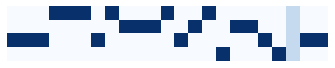

In [58]:
plt.clf()
fig, ax = plt.subplots(figsize=(5.75,1))
ax.imshow(img2, interpolation='none', cmap='Blues', aspect='auto')
#ax.set_title(seq2, color='yellow',fontsize= 20)
plt.axis('off')
plt.savefig('data/target_temp.png',bbox_inches = 'tight',pad_inches=0)
#plt.show()

In [1]:
def save_img(img,loc,i):
    #plt.clf()
    fig, ax = plt.subplots(figsize=(7,1))
    ax.imshow(img, interpolation='none', cmap='Blues', aspect='auto')
    plt.axis('off')
    #plt.savefig('data/'+str(loc)+'_'+str(i+1)+'.png',bbox_inches = 'tight',pad_inches=0)
    plt.savefig('data/'+str(loc)+'/'+str(loc)+'_'+str(i+1)+'.png',bbox_inches = 'tight',pad_inches=0)
    plt.close(fig)

In [7]:
data = pd.read_excel('dataset-SY.xlsx')

In [8]:
data

,TARGET,CELL LINE,N-padded off-target,off-target label,N-padded target,target label,FREQ,Y
0,EMX1,K562,NNNNGAGTCAGAGAGAGAAGAAGAAGAG,off_1,NNNNGAGTCCGAG-CAGAAGAAGAANGG,target_1,0.038835,1
1,EMX1,K562,NNNNGAGGCAGAGCAAGAAGAAAAAAGG,off_2,NNNNGAGTCCGAGC-AGAAGAAGAANGG,target_2,0.038835,1
2,HEK_2,HEK293,NNNNAAACACAAAGACATAGACCACTGG,off_3,NNNNGAACACAAAG-CATAGACTGCNGG,target_3,0.037714,1
3,HEK_2,HEK293,NNNNGTACACAAAACATAAGACTGCTGG,off_4,NNNNGAACACAAAGCAT-AGACTGCNGG,target_4,0.020571,1
4,HEK_2,K562,NNNNAAACACAAAGACATAGACCACTGG,off_5,NNNNGAACACAAAG-CATAGACTGCNGG,target_5,0.021798,1
...,...,...,...,...,...,...,...,...
153919,VEGFA_3,NaN,NNNNNTGTGTGTATGTGTGTGTGTGTGG,off_153920,NNNNNGGTGAGTGAGTGTGTGCGTGNGG,target_153920,NaN,0
153920,VEGFA_3,NaN,NNNNNCGTGTGTGTGTGTGTGTGTGTTG,off_153921,NNNNNGGTGAGTGAGTGTGTGCGTGNGG,target_153921,NaN,0
153921,VEGFA_3,NaN,NNNNNTGTGCGTGTGTGTGTGTGTGTGT,off_153922,NNNNNGGTGAGTGAGTGTGTGCGTGNGG,target_153922,NaN,0
153922,VEGFA_3,NaN,NNNNNGGTGTGGTGGTGTGTGCCTGTGG,off_153923,NNNNNGGTGAGTGAGTGTGTGCGTGNGG,target_153923,NaN,0


In [25]:
small = data.head()

In [6]:
def make_images(df):
    start = 
    end = 
    n,m = df.shape
    off_list = df['N-padded off-target'].values
    tar_list = df['N-padded target'].values
    for i in tqdm(range(n)):
        off = custom_onehot(np.array(list(off_list[i])))
        save_img(off,'off',i)
        tar = custom_onehot(np.array(list(tar_list[i])))
        save_img(tar,'target',i)
        
        #print (off,tar)
    return None

SyntaxError: invalid syntax (<ipython-input-6-2772f9d1308f>, line 2)

In [9]:
reg = data['FREQ']

In [13]:
reg = pd.DataFrame(reg[0:6000].values,columns=['freq'])

In [14]:
reg.to_csv('reg6000.csv')

In [30]:
make_images(small)

100%|██████████| 5/5 [00:00<00:00,  5.12it/s]


In [37]:
#ot_len = [len(item) for item in data['N-padded target'].values]

In [38]:
#set(ot_len)

{28}

In [72]:
small

,TARGET,CELL LINE,N-padded off-target,off-target label,N-padded target,target label,FREQ,Y
0,EMX1,K562,NNNNGAGTCAGAGAGAGAAGAAGAAGAG,off_1,NNNNGAGTCCGAG-CAGAAGAAGAANGG,target_1,0.038835,1
1,EMX1,K562,NNNNGAGGCAGAGCAAGAAGAAAAAAGG,off_2,NNNNGAGTCCGAGC-AGAAGAAGAANGG,target_2,0.038835,1
2,HEK_2,HEK293,NNNNAAACACAAAGACATAGACCACTGG,off_3,NNNNGAACACAAAG-CATAGACTGCNGG,target_3,0.037714,1
3,HEK_2,HEK293,NNNNGTACACAAAACATAAGACTGCTGG,off_4,NNNNGAACACAAAGCAT-AGACTGCNGG,target_4,0.020571,1
4,HEK_2,K562,NNNNAAACACAAAGACATAGACCACTGG,off_5,NNNNGAACACAAAG-CATAGACTGCNGG,target_5,0.021798,1


In [ ]:
#soft coloring

In [6]:
# fig, ax = plt.subplots(figsize=(5.75,1))
# ax.imshow(img1, interpolation='gaussian', cmap='Blues', aspect='auto')
# ax.set_title(seq1, color='yellow',fontsize= 21)
# plt.show()

In [5]:
# fig, ax = plt.subplots(figsize=(5.75,1))
# ax.imshow(img2, interpolation='gaussian', cmap='Blues', aspect='auto')
# ax.set_title(seq2, color='yellow',fontsize= 20)
# plt.show()

In [4]:
############## code below this is garbage.

In [ ]:
# from PIL import Image

In [ ]:
# pil_img1 = Image.fromarray(img1, 'P')
# pil_img2 = Image.fromarray(img2, 'P')

In [ ]:
# newsize = (230, 50) 
# pil_img1 = pil_img1.resize(newsize)
# pil_img2 = pil_img2.resize(newsize)

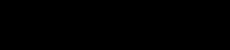

In [ ]:
# pil_img1 

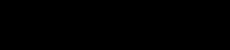

In [ ]:
# pil_img2

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# label_encoder.fit(np.array(['-','A','C','G','T','N']))
# integer_encoded = label_encoder.transform(arr2)
# integer_encoded
# def one_hot_encoder(my_array):
#     integer_encoded = label_encoder.transform(my_array)
#     onehot_encoder = OneHotEncoder(sparse=False, dtype=float)
#     integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#     onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#     onehot_encoded = np.delete(onehot_encoded, -1, 1)
#     return onehot_encoded